In [357]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib as mpl
from scipy import stats
import numpy_indexed as npi 
import glob, os
from mpl_toolkits.mplot3d import Axes3D
import emcee
from scipy import interpolate
import warnings
from scipy import stats
from scipy.interpolate import interp1d
warnings.filterwarnings("ignore")
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


In [429]:
# high resolution
a=np.genfromtxt('./loc/blr.con_H7-14_phi17-24_col23_metal2_grid0.125',usecols=[0,6,1])
print a.shape

(26732772, 3)


In [430]:

mgii_ew=[]
ha_ew=[]
hb_ew=[]
mgii_f=[]
ha_f=[]
hb_f=[]
l3000=[]
F3000=[]
F1216=[]
U=[]
I=[]

#line base width 28,32,44 A
#flux=np.zeros(8228)
flux=[]
c=0
for i in np.arange(7,14.125,0.125):
    for j in np.arange(17,24.125,0.125):
        #print np.round(i,2)
        n=8228
        n0=0
        n0=n0+n*c
        n=n+n*c
        c=c+1
        U.append(np.round(j-i-10.5,2))
        I.append(i)
        #if (i >11) & (i < 11.2) & (j ==18.) :
            #plt.plot(a[n0:n,0],np.log10(a[n0:n,1]/a[n0:n,0]),'k',lw=1,alpha=0.5)

        f3000=(a[n0:n,2]/a[n0:n,0])[5526]
        F3000.append(f3000)
        f1216=(a[n0:n,2]/a[n0:n,0])[5798]
        F1216.append((a[n0:n,2]/a[n0:n,0])[5798])
       
        ha_f.append( ((a[n0:n,1]/a[n0:n,0])[5291]-(a[n0:n,1]/a[n0:n,0])[5290])*22 )
        hb_f.append( ((a[n0:n,1]/a[n0:n,0])[5381]-(a[n0:n,1]/a[n0:n,0])[5380])*16 )
        mgii_f.append( ((a[n0:n,1]/a[n0:n,0])[5547]-(a[n0:n,1]/a[n0:n,0])[5545])*14 )

        ha_ew.append( ((a[n0:n,1]/a[n0:n,0])[5291]-(a[n0:n,1]/a[n0:n,0])[5292])*22/f1216 )
        hb_ew.append( ((a[n0:n,1]/a[n0:n,0])[5381]-(a[n0:n,1]/a[n0:n,0])[5382])*16/f1216 )
        mgii_ew.append( ((a[n0:n,1]/a[n0:n,0])[5547]-(a[n0:n,1]/a[n0:n,0])[5548])*14/f1216 )
        
       
        
l3000=np.array(l3000)
F3000=np.array(F3000)
F1216=np.array(F1216)
ha_f=np.array(ha_f)
hb_f=np.array(hb_f)
mgii_f=np.array(mgii_f)
ha_ew=np.array(ha_ew)
hb_ew=np.array(hb_ew)
mgii_ew=np.array(mgii_ew)
U=np.array(U)
I=np.array(I)
flux=np.array(flux)

'''
data=np.genfromtxt('./loc/blr.line_H7-14_phi17-24_col23_metal2_grid0.125',usecols=[2,3,4,5])
mgii_f=data[:,2]+data[:,3]
hb_f=data[:,0]
ha_f=data[:,1]
mgii_ew=mgii_f/F1216
hb_ew=hb_f/F1216
ha_ew=ha_f/F1216
'''

"\ndata=np.genfromtxt('./loc/blr.line_H7-14_phi17-24_col23_metal2_grid0.125',usecols=[2,3,4,5])\nmgii_f=data[:,2]+data[:,3]\nhb_f=data[:,0]\nha_f=data[:,1]\nmgii_ew=mgii_f/F1216\nhb_ew=hb_f/F1216\nha_ew=ha_f/F1216\n"

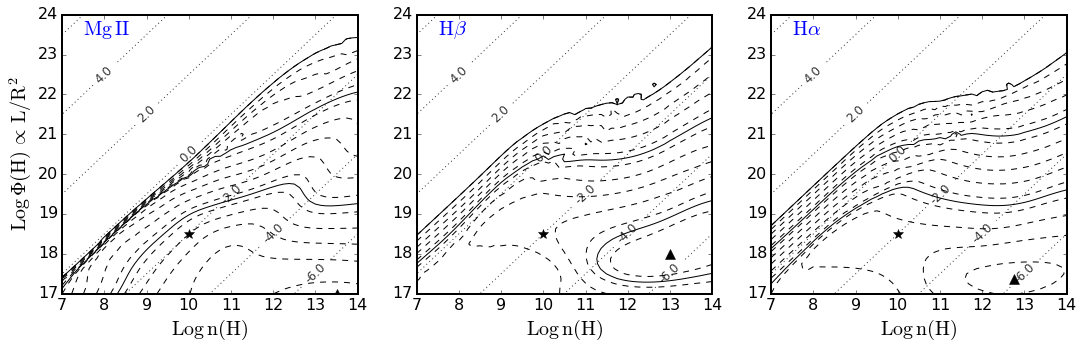

In [431]:
X,Y = np.mgrid[7:14.125:0.125,17:24.125:0.125]
X1,Y1 = np.mgrid[7:14.5:0.5,17:24.5:0.5]
U=Y1-X1-10.5

plt.figure(figsize=(18,5))
plt.style.use('my')
plt.subplot(131)
indm=mgii_ew.argmax()
Z=np.log10((mgii_ew.reshape(57,57)))

cs=plt.contour(X1,Y1,U,colors='k',linestyles='dotted',linewidths=1,alpha=0.8)
plt.clabel(cs, fontsize=12,fmt='%1.1f')
plt.contour(X,Y,Z,levels=np.arange(0.1,4,0.2),linestyles='dashed',colors='k',linewidths=1)
plt.contour(X,Y,Z,levels=[0.1,1.,2.,3.],colors='k',linewidths=1)
plt.xlabel(r'$\rm Log\,n(H)$')
plt.ylabel(r'$\rm Log\,\Phi(H)\,\propto\,L/R^{2}$')
plt.text(7.5,23.5,r'$\rm Mg\,II$',color='blue',fontsize=20)
plt.plot(X.flatten()[indm],Y.flatten()[indm],'k^')
plt.plot(10,18.5,'k*')

plt.subplot(132)
indm=hb_ew.argmax()
Z=np.log10((hb_ew.reshape(57,57)))
cs=plt.contour(X1,Y1,U,colors='k',linestyles='dotted',linewidths=1,alpha=0.8)
plt.clabel(cs, inline=1, fontsize=12,fmt='%1.1f')
plt.contour(X,Y,Z,levels=np.arange(0.1,4,0.2),linestyles='dashed',colors='k',linewidths=1)
plt.contour(X,Y,Z,levels=[0.1,1.,2.,3],colors='k',linewidths=1)

plt.xlabel(r'$\rm Log\,n(H)$')
plt.text(7.5,23.5,r'$\rm H\beta$',color='blue',fontsize=20)
plt.plot(X.flatten()[indm],Y.flatten()[indm],'k^')
plt.plot(10,18.5,'k*')

plt.subplot(133)
indm=ha_ew.argmax()
Z=np.log10((ha_ew.reshape(57,57)))
cs=plt.contour(X1,Y1,U,colors='k',linestyles='dotted',linewidths=1,alpha=0.8)
plt.clabel(cs, inline=1, fontsize=12,fmt='%1.1f')
plt.contour(X,Y,Z,levels=np.arange(0.1,4,0.2),linestyles='dashed',colors='k',linewidths=1)
plt.contour(X,Y,Z,levels=[0.1,1.,2.,3],colors='k',linewidths=1)
#plt.ylabel(r'$\rm Log\,\Phi(H)$')
plt.xlabel(r'$\rm Log\,n(H)$')
plt.text(7.5,23.5,r'$\rm H\alpha$',color='blue',fontsize=20)
plt.plot(X.flatten()[indm],Y.flatten()[indm],'k^')
plt.plot(10,18.5,'k*')
#plt.savefig('../paper_fig/LOC.pdf')

In [432]:
fwhm_mgii=[]
ew_mgii=[]
area_mgii=[]
area_mgii_err=[]
fwhm_hb=[]
ew_hb=[]
area_hb=[]
area_hb_err=[]
fwhm_ha=[]
ew_ha=[]
area_ha=[]
area_ha_err=[]
L3000=[]
L3000_err=[]
L5100=[]
mjd=[]
obj=[]
name=[]
c=0
#for j in ['../spectra/results_j1413/add_heII/*fits','../spectra/results_j0225/*fits','../spectra/results_j1525/*fits']:
#for j in ['../spectra/results_j1413/add_heII/*fits']:
for j in ['../spectra/results_j1413/hb_single/*fits']:
    for i in glob.glob(j):
        name.append(i[-20:-5])
        d=fits.open(i)[1].data
        mjd.append(float(d['mjd'][0]))
        z=float(d['redshift'][0])
        fwhm_mgii.append(float(d['MgII_whole_br_fwhm'][0]))
        ew_mgii.append(float(d['MgII_whole_br_ew'][0]))
        area_mgii.append(float(d['MgII_whole_br_area'][0])/(1.+z))
        area_mgii_err.append(float(d['MgII_whole_br_area_err'][0]))
        
        fwhm_hb.append(float(d['Hb_whole_br_fwhm'][0]))
        ew_hb.append(float(d['Hb_whole_br_ew'][0]))
        area_hb.append(float(d['Hb_whole_br_area'][0])/(1.+z))
        area_hb_err.append(float(d['Hb_whole_br_area_err'][0]))
        try:
            fwhm_ha.append(float(d['Ha_whole_br_fwhm'][0]))
            ew_ha.append(float(d['Ha_whole_br_ew'][0]))
            area_ha.append(float(d['Ha_whole_br_area'][0])/(1.+z))
            area_ha_err.append(float(d['Ha_whole_br_area_err'][0]))
        except:
            fwhm_ha.append(0)
            ew_ha.append(0)
            area_ha.append(0)
            area_ha_err.append(0)
        L3000.append(float(d['L3000']))
        L3000_err.append(float(d['L3000_err']))
        L5100.append(float(d['L5100']))
ew_mgii=np.array(ew_mgii)
ew_ha=np.array(ew_ha)
ew_hb=np.array(ew_hb)
L3000=np.array(L3000)
L3000_err=np.array(L3000_err)
fwhm_mgii=np.array(fwhm_mgii)
area_mgii=np.array(area_mgii)
area_hb=np.array(area_hb)
area_ha=np.array(area_ha)
name=np.array(name)

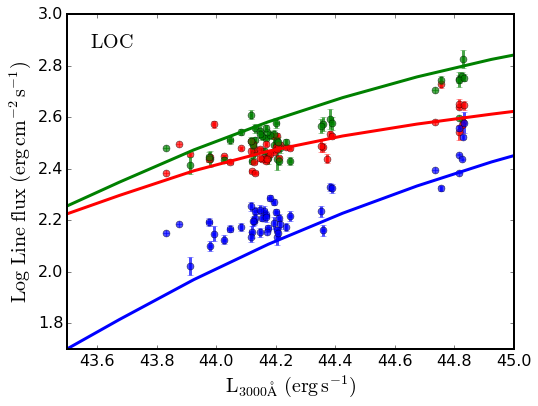

In [568]:
plt.figure(figsize=(8,6))
ax=plt.subplot(111)

area_mgii[-2:] = 0
area_hb[-3:] = 0
area_ha[-3:] = 0
area_hb[52:55] = 0
area_hb[58:60] = 0

ind1=np.where(area_mgii > 0,True, False)
ind2=np.where(area_hb > 10,True, False)
ind3=np.where(area_ha > 10,True,False)


#print L3000.shape


plt.style.use('my')
for i in range(len(L3000)):
    n=7
    if i <50:
        marker = 'o'
    if (i >=50) and (i <66):
        marker = '^'
    if i >= 66:
        marker = '*'
        n=10
        
    #plt.plot(L3000[i],area_mgii[i],'r',marker=marker)
    if (L3000[i] > 44.7) & (np.log10(fwhm_hb[i]) > 3.7):
        print name[i]
    
    plt.errorbar(L3000[i],np.log10(area_mgii[i]),xerr=L3000_err[i],yerr=np.log10(area_mgii[i]+
    area_mgii_err[i])-np.log10(area_mgii[i]),color='r',marker=marker,markersize=n,alpha=0.7)
    plt.errorbar(L3000[i],np.log10(area_hb[i]),xerr=L3000_err[i],yerr=np.log10(area_hb[i]+
    area_hb_err[i])-np.log10(area_hb[i]),color='b',marker=marker,markersize=n,alpha=0.7)
    if area_ha_err[i] <1000:
        plt.errorbar(L3000[i],np.log10(area_ha[i]),xerr=L3000_err[i],yerr=np.log10(area_ha[i]+
        area_ha_err[i])-np.log10(area_ha[i]),color='g',marker=marker,markersize=n,alpha=0.7) 
      

nn=0

plt.xlim(43.5,45.)
plt.ylim(1.7,3)
plt.plot([],[],'k',marker='o',markersize=n,alpha=0.5,label=r'$\rm Bright\,\,H\beta\,\, CL$')
plt.plot([],[],'k',marker='^',markersize=n,alpha=0.5,label=r'$\rm Intermediate\,\,H\beta\,\, CL$')
plt.plot([],[],'k',marker='*',markersize=n,alpha=0.5,label=r'$\rm Faint\,\,Mg\,II\, CL$')
plt.plot([],[],'r',label=r'$\rm Mg\;II$')
plt.plot([],[],'b',label=r'$\rm H\beta$')
plt.plot([],[],'g',label=r'$\rm H\alpha$')
plt.text(0.05,0.9,r'$\rm LOC$',fontsize=20,transform=ax.transAxes)
#plt.legend(loc='best',numpoints=1,ncol=2,framealpha=1)
plt.xlabel(r'$\rm L_{3000\AA} \,\,(erg\,s^{-1})$')
plt.ylabel(r'$\rm Log\,\,Line\,\, flux\,\, (erg\,cm^{-2}\,s^{-1})$')
#plt.yscale('log')


model=np.genfromtxt('./model.txt')

ff=1.6
plt.plot(model[:,0],np.log10(model[:,1]*ff),'r',model[:,0],np.log10(model[:,2]*ff),'b',model[:,0],np.log10(model[:,3]*ff),'g')

#plt.savefig('../paper_fig/corr_LOC.pdf')
#plt.savefig('/Users/legolason/Desktop/CL_mgII/corr_LOC.pdf')

(1.7, 3)

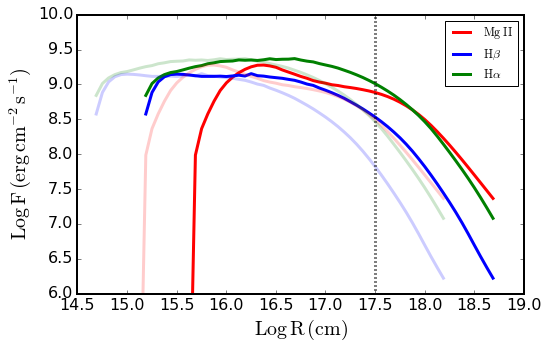

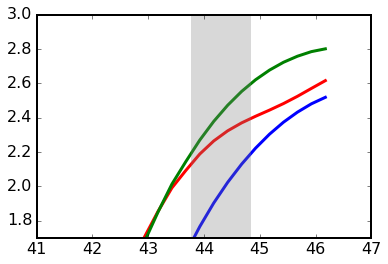

In [569]:
data=np.genfromtxt('./loc/blr.line_H7-14_phi17-24_col23_metal2_grid0.125',usecols=[2,3,4,5])

mgii_f=(data[:,2]+data[:,3])
hb_f=data[:,0]
ha_f=data[:,1]


mgii_R=[]
hb_R=[]
ha_R=[]
nn=57
for i in range(nn):
    mgii_R.append( mgii_f[i::nn][9:41].sum())
    hb_R.append( hb_f[i::nn][9:41].sum())
    ha_R.append( ha_f[i::nn][9:41].sum())
mgii_R=np.array(mgii_R)
hb_R=np.array(hb_R)
ha_R=np.array(ha_R)



plt.figure(figsize=(8,5))


#rr=2.e43
QH=3.e55
R=np.sqrt(QH/12.56/10**np.arange(17,24.125,0.125))
plt.plot(np.log10(R),np.log10(mgii_R),'r',label=r'$\rm Mg\;II$')
plt.plot(np.log10(R),np.log10(hb_R),'b',label=r'$\rm H\beta$')
plt.plot(np.log10(R),np.log10(ha_R),'g',label=r'$\rm H\alpha$')

QH=3.e54
R=np.sqrt(QH/12.56/10**np.arange(17,24.125,0.125))
plt.plot(np.log10(R),np.log10(mgii_R),'r',alpha=0.2)
plt.plot(np.log10(R),np.log10(hb_R),'b',alpha=0.2)
plt.plot(np.log10(R),np.log10(ha_R),'g',alpha=0.2)


#plt.xlim(15.,18)
plt.ylabel(r'$\rm Log\, F\, (erg\,cm^{-2}\,s^{-1})$')
plt.xlabel(r'$\rm Log\,R\,(cm)$')
plt.legend()
plt.ylim(6,10)

Rout=17.5
plt.plot([Rout,Rout],[0,10],'k:')



Lline_mgii=[]
Lline_ha=[]
Lline_hb=[]
plt.figure()
QH=np.logspace(52.,57.,100)
for i in QH:
    qh=i
    R=np.sqrt(qh/12.56/10**np.arange(17,24.125,0.125))
    ind=np.where( (R < 10**Rout) ,True,False )
    Lline_mgii.append( (R[ind]**2*mgii_R[ind]).sum() )
    Lline_hb.append( (R[ind]**2*hb_R[ind]).sum() )
    Lline_ha.append( (R[ind]**2*ha_R[ind]).sum() )   
Lline_ha=np.array(Lline_ha)
Lline_mgii=np.array(Lline_mgii)
Lline_hb=np.array(Lline_hb)


ff=Lline_ha.max()/700
sf=10.7 #0.7 is log10(5.15) 

for line in zip([Lline_mgii,Lline_hb,Lline_ha],['r','b','g']):
    means, bin_edges, binnumber = stats.binned_statistic(np.log10(QH)-sf,line[0]/ff, statistic='mean',bins=20)
    plt.plot((bin_edges[:-1]+ bin_edges[1:])/2.,np.log10(means),line[1])
    w=(bin_edges[:-1]+ bin_edges[1:])/2.
    if line[1] == 'r':
        rf=np.asarray(means)
    if line[1] == 'b':
        bf=np.asarray(means)
    if line[1] == 'g':
        gf=np.asarray(means)
plt.axvline(x=44.3, ymin=0,ymax=1000, linewidth=60, color='grey',alpha=0.3)        
np.savetxt('./model.txt',np.c_[w,rf,bf,gf])
#plt.xlim(42.5,47.5)
plt.ylim(1.7,3)

(0, 6)

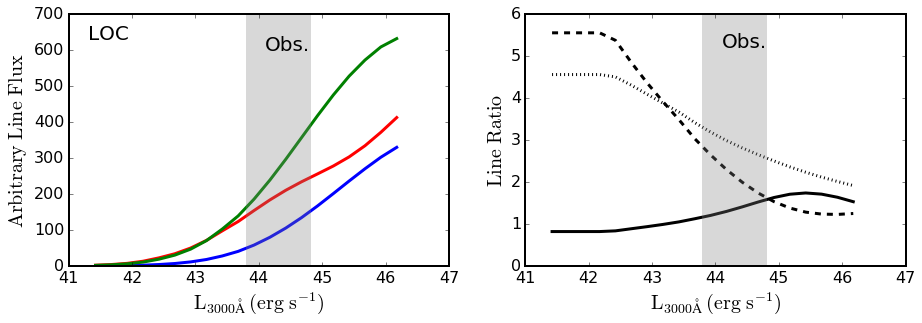

In [570]:
model=np.genfromtxt('./model.txt')

plt.figure(figsize=(15,5))
plt.subplots_adjust(bottom=0.2)
ax1=plt.subplot(121)
plt.plot(model[:,0],(model[:,1]),'r',label=r'$\rm Mg\,II$')
plt.plot(model[:,0],(model[:,2]),'b',label=r'$\rm H\beta$')
plt.plot(model[:,0],(model[:,3]),'g',label=r'$\rm H\alpha$')
plt.ylabel(r'$\rm Arbitrary\,\,Line\,\, Flux$')
plt.text(0.05,0.9,'LOC',fontsize=20,transform=ax1.transAxes)
#plt.legend(loc='best')
plt.text(44.1,600,'Obs.',fontsize=20)
plt.axvline(x=44.3, ymin=0,ymax=1000, linewidth=65, color='grey',alpha=0.3)
plt.xlabel(r"$\rm L_{3000\AA}\, (erg\,\, s^{-1})$")
#plt.ylim(1.8,3.0)

ax1=plt.subplot(122)
plt.plot(model[:,0],model[:,3]/model[:,1],'k',label=r'$\rm H\alpha/Mg\;II$')
plt.plot(model[:,0],model[:,3]/model[:,2],'k:',label=r'$\rm H\alpha/H\beta$')
plt.plot(model[:,0],model[:,1]/model[:,2],'k--',label=r'$\rm Mg\;II/H\beta$')

plt.axvline(x=44.3, ymin=0,ymax=1000, linewidth=65, color='grey',alpha=0.3)
plt.text(44.1,5.2,'Obs.',fontsize=20)
plt.xlabel(r"$\rm L_{3000\AA}\, (erg\,\, s^{-1})$")
plt.ylabel(r'$\rm Line\,\, Ratio$')

#plt.legend(loc='best')
plt.ylim(0,6)
#plt.savefig('/Users/legolason/Desktop/CL_mgII/model_LOC.pdf')

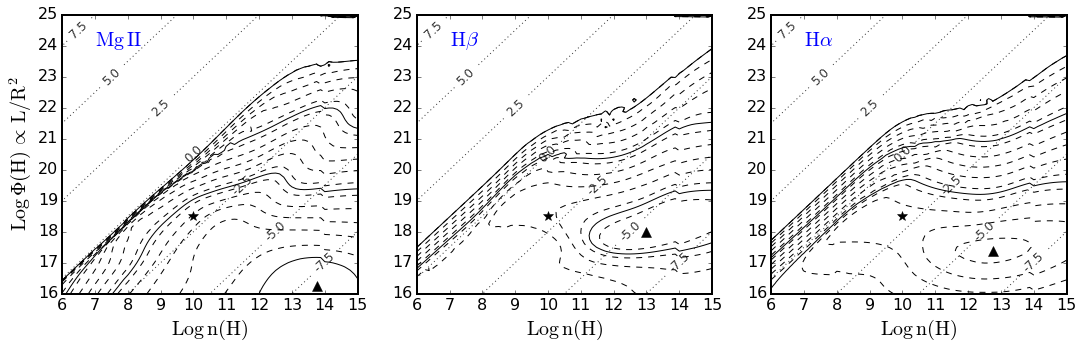

In [1451]:
F1216=np.genfromtxt('./loc/blr.con_H6-15_phi16-25_col23_metal2_grid0.125_F1216')
data=np.genfromtxt('./loc/blr.line_H6-15_phi16-25_col23_metal2_grid0.125',usecols=[2,3,4,5])
mgii_f=data[:,2]+data[:,3]
hb_f=data[:,0]
ha_f=data[:,1]
mgii_ew=mgii_f/F1216
hb_ew=hb_f/F1216
ha_ew=ha_f/F1216

X,Y = np.mgrid[6:15.125:0.125,16:25.125:0.125]
X1,Y1 = np.mgrid[6:15.5:0.5,16:25.5:0.5]
U=Y1-X1-10.5

plt.figure(figsize=(18,5))
plt.style.use('my')
plt.subplot(131)
indm=mgii_ew.argmax()
Z=np.log10((mgii_ew.reshape(73,73)))

cs=plt.contour(X1,Y1,U,colors='k',linestyles='dotted',linewidths=1,alpha=0.8)
plt.clabel(cs, fontsize=12,fmt='%1.1f')
plt.contour(X,Y,Z,levels=np.arange(0.1,4,0.2),linestyles='dashed',colors='k',linewidths=1)
plt.contour(X,Y,Z,levels=[0.1,1.,2.,3.],colors='k',linewidths=1)
plt.xlabel(r'$\rm Log\,n(H)$')
plt.ylabel(r'$\rm Log\,\Phi(H)\,\propto\,L/R^{2}$')
plt.text(7.,24,r'$\rm Mg\,II$',color='blue',fontsize=20)
plt.plot(X.flatten()[indm],Y.flatten()[indm],'k^')
plt.plot(10,18.5,'k*')

plt.subplot(132)
indm=hb_ew.argmax()
Z=np.log10((hb_ew.reshape(73,73)))
cs=plt.contour(X1,Y1,U,colors='k',linestyles='dotted',linewidths=1,alpha=0.8)
plt.clabel(cs, inline=1, fontsize=12,fmt='%1.1f')
plt.contour(X,Y,Z,levels=np.arange(0.1,4,0.2),linestyles='dashed',colors='k',linewidths=1)
plt.contour(X,Y,Z,levels=[0.1,1.,2.,3],colors='k',linewidths=1)

plt.xlabel(r'$\rm Log\,n(H)$')
plt.text(7.,24,r'$\rm H\beta$',color='blue',fontsize=20)
plt.plot(X.flatten()[indm],Y.flatten()[indm],'k^')
plt.plot(10,18.5,'k*')

plt.subplot(133)
indm=ha_ew.argmax()
Z=np.log10((ha_ew.reshape(73,73)))
cs=plt.contour(X1,Y1,U,colors='k',linestyles='dotted',linewidths=1,alpha=0.8)
plt.clabel(cs, inline=1, fontsize=12,fmt='%1.1f')
plt.contour(X,Y,Z,levels=np.arange(0.1,4,0.2),linestyles='dashed',colors='k',linewidths=1)
plt.contour(X,Y,Z,levels=[0.1,1.,2.,3],colors='k',linewidths=1)
#plt.ylabel(r'$\rm Log\,\Phi(H)$')
plt.xlabel(r'$\rm Log\,n(H)$')
plt.text(7.,24,r'$\rm H\alpha$',color='blue',fontsize=20)
plt.plot(X.flatten()[indm],Y.flatten()[indm],'k^')
plt.plot(10,18.5,'k*')
plt.savefig('../paper_fig/LOC_extend.pdf')

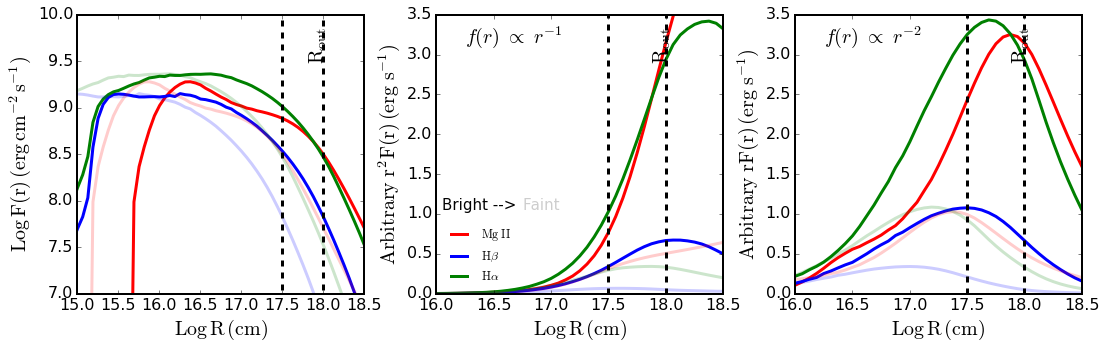

In [575]:
data=np.genfromtxt('./loc/blr.line_H6-15_phi16-25_col23_metal2_grid0.125',usecols=[2,3,4,5])

mgii_f=data[:,2]+data[:,3]
hb_f=data[:,0]
ha_f=data[:,1]


mgii_R=[]
hb_R=[]
ha_R=[]
nn=73
for i in range(nn):
    mgii_R.append( mgii_f[i::nn][17:49].sum())
    hb_R.append( hb_f[i::nn][17:49].sum())
    ha_R.append( ha_f[i::nn][17:49].sum())
mgii_R=np.array(mgii_R)
hb_R=np.array(hb_R)
ha_R=np.array(ha_R)



plt.figure(figsize=(18,5))
plt.subplots_adjust(wspace=0.25)
ax1=plt.subplot(131)
for ii in zip([3.e55,3.e54],[1,0.2]):
    QH=ii[0]
    R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
    plt.plot(np.log10(R),np.log10(mgii_R),'r',alpha=ii[1],label=r'$\rm Mg\;II$')
    plt.plot(np.log10(R),np.log10(hb_R),'b',alpha=ii[1],label=r'$\rm H\beta$')
    plt.plot(np.log10(R),np.log10(ha_R),'g',alpha=ii[1],label=r'$\rm H\alpha$')
plt.plot([Rout,Rout],[0,10],'k--')
plt.plot([Rout+0.5,Rout+0.5],[0,10],'k--')
plt.xlim(15.,18.5)
plt.ylabel(r'$\rm Log\, F(r)\, (erg\,cm^{-2}\,s^{-1})$')
plt.xlabel(r'$\rm Log\,R\,(cm)$')
plt.ylim(7,10)
plt.text(0.8,0.9,r'$\rm R_{out}$',rotation=90,fontsize=20,transform=ax1.transAxes)

ax2=plt.subplot(132)
for ii in zip([3.e55,3.e54],[1,0.2]):
    rr=1.e44
    QH=ii[0]
    R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
    plt.plot(np.log10(R),(R**2*mgii_R)/rr,'r',alpha=ii[1])
    plt.plot(np.log10(R),(R**2*hb_R)/rr,'b',alpha=ii[1])
    plt.plot(np.log10(R),(R**2*ha_R)/rr,'g',alpha=ii[1])
plt.xlim(16,18.5)
plt.ylabel(r'$\rm Arbitrary\,\,r^2F(r)\, (erg\,\,s^{-1})$')
plt.xlabel(r'$\rm Log\,R\,(cm)$')
plt.plot([Rout,Rout],[0,4.],'k--')
plt.plot([Rout+0.5,Rout+0.5],[0,10],'k--')
plt.text(0.75,0.9,r'$\rm R_{out}$',rotation=90,fontsize=20,transform=ax2.transAxes)
plt.text(0.1,0.9,r'$f(r)\,\, \propto \,\, r^{-1}$ ',fontsize=20,transform=ax2.transAxes)
plt.ylim(0,3.5)
plt.plot([],[],'r',label=r'$\rm Mg\;II$')
plt.plot([],[],'b',label=r'$\rm H\beta$')
plt.plot([],[],'g',label=r'$\rm H\alpha$')
plt.text(0.02,0.3,r'Bright -->',fontsize=15,transform=ax2.transAxes)
plt.text(0.3,0.3,r'Faint',fontsize=15,transform=ax2.transAxes,alpha=0.2)

plt.legend(loc=3,frameon=False)

ax3=plt.subplot(133)
for ii in zip([3.e55,3.e54],[1,0.2]):
    rr=1.e26
    QH=ii[0]
    R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
    plt.plot(np.log10(R),(R**1.*mgii_R)/rr,'r',alpha=ii[1],label=r'$\rm Mg\;II$')
    plt.plot(np.log10(R),(R**1.*hb_R)/rr,'b',alpha=ii[1],label=r'$\rm H\beta$')
    plt.plot(np.log10(R),(R**1.*ha_R)/rr,'g',alpha=ii[1],label=r'$\rm H\alpha$')
plt.xlim(16,18.5)
plt.ylabel(r'$\rm Arbitrary\,\, rF(r)\, (erg\,\,s^{-1})$')
plt.xlabel(r'$\rm Log\,R\,(cm)$')
plt.plot([Rout,Rout],[0,3.5],'k--')
plt.plot([Rout+0.5,Rout+0.5],[0,3.5],'k--')
plt.text(0.75,0.9,r'$\rm R_{out}$',rotation=90,fontsize=20,transform=ax3.transAxes)
plt.text(0.1,0.9,r'$f(r)\,\, \propto \,\, r^{-2}$ ',fontsize=20,transform=ax3.transAxes)
#plt.savefig('/Users/legolason/Desktop/CL_mgII/emissivity.pdf')

2.443459698303397e+17


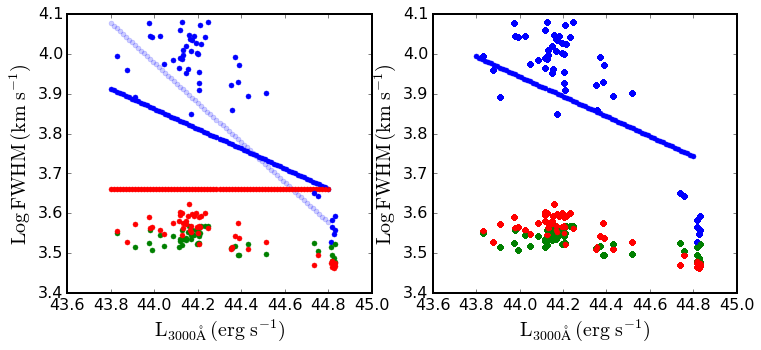

In [643]:
plt.figure(figsize=(12,5))
plt.subplot(121)
Lline_mgii=[]
Lline_ha=[]
Lline_hb=[]
mgii_Peak=[]
for i in range(73):
    QH=np.logspace(55.5,54.5,73)[i]
    R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
    mx=1.2e18
    
    hb_peak = R[(R**2.*hb_R).argmax()].clip(max =mx)
    ha_peak = R[(R**2.*ha_R).argmax()].clip(max =mx)
    mgii_peak = R[(R**2.*mgii_R).argmax()].clip(max =mx)
    fc=12.7
    plt.plot(np.log10(QH)-10.7,np.log10(1./np.sqrt(hb_peak))+fc,'b.')
    plt.plot(np.log10(QH)-10.7,np.log10(4.5e21/(hb_peak)),'b.',alpha=0.2)
    #plt.plot(np.log10(QH)-10.7,np.log10(1./np.sqrt(ha_peak))+fc,'g.')
    plt.plot(np.log10(QH)-10.7,np.log10(1./np.sqrt(mgii_peak))+fc,'r.')
    
    
plt.plot(L3000,np.log10(fwhm_hb),'b.')
plt.plot(L3000,np.log10(fwhm_ha),'g.')
plt.plot(L3000,np.log10(fwhm_mgii),'r.')
plt.xlabel(r"$\rm L_{3000\AA}\, (erg\,\, s^{-1})$")
plt.ylabel(r"$\rm Log\,FWHM\, (km\,\,s^{-1})$")

plt.subplot(122)
for i in range(73):
    QH=np.logspace(55.5,54.5,73)[i]
    R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
    mx=1.2e18
    hb_peak = R[(R**1.*hb_R).argmax()].clip(max =mx)
    ha_peak = R[(R**1.*ha_R).argmax()].clip(max =mx)
    mgii_peak = R[(R**1.*mgii_R).argmax()].clip(max =mx)
    
    
    mgii_Peak.append(mgii_peak)
    ind=np.where( (R < mx) ,True,False )
    Lline_mgii.append( (R[ind]**2*mgii_R[ind]).sum() )
    Lline_hb.append( (R[ind]**2*hb_R[ind]).sum() )
    Lline_ha.append( (R[ind]**2*ha_R[ind]).sum() )
    # R propto 1/v^2
    fc=12.5
    plt.plot(np.log10(QH)-10.7,np.log10(1./np.sqrt(hb_peak))+fc,'b.')
    
    #plt.plot(np.log10(QH)-10.7,np.log10(1./np.sqrt(ha_peak))+fc,'g.')
    #plt.plot(np.log10(QH)-10.7,np.log10(1./np.sqrt(mgii_peak))+fc,'r.')
    plt.plot(L3000,np.log10(fwhm_hb),'b.')
    plt.plot(L3000,np.log10(fwhm_ha),'g.')
    plt.plot(L3000,np.log10(fwhm_mgii),'r.')
print mgii_peak
plt.xlabel(r"$\rm L_{3000\AA}\, (erg\,\, s^{-1})$")
plt.ylabel(r"$\rm Log\,FWHM\, (km\,\,s^{-1})$")


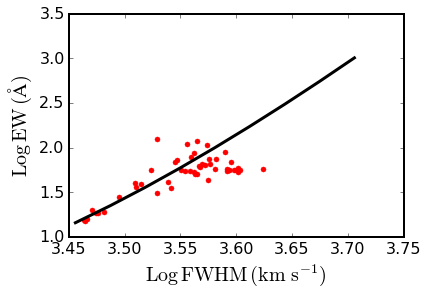

In [636]:
L=np.logspace(44.8,43.8,73)
plt.plot(np.log10(fwhm_mgii),np.log10(ew_mgii),'r.')
#plt.plot(np.log10(fwhm_hb),np.log10(ew_hb),'b.')
#plt.plot(np.log10(fwhm_ha),np.log10(ew_ha),'g.')
plt.xlabel(r"$\rm Log\,FWHM\, (km\,\,s^{-1})$")
plt.ylabel(r"$\rm Log\,EW\, (\AA)$")
nn=9
plt.plot(np.log10(1/np.sqrt(mgii_Peak)[::nn])+12.4, np.array(Lline_mgii[::nn])/L[::nn]/3.3 ,'k')